In [27]:
# Daten einlesen
wetterdaten <- readRDS("datasets/rds/wetterdaten.rds")


# Ort für die Analyse festlegen
norderney <- wetterdaten[[6]]

# Zeitindex als unabhängige Variable hinzufügen, weil Datum als unabhängige Variable nicht funktioniert, weil es nicht numerisch ist
norderney$Zeitindex <- as.numeric(norderney$MESS_DATUM - min(norderney$MESS_DATUM))

# Unnötige Spalten entfernen
norderney$MESS_DATUM <- NULL
norderney$STATIONS_ID <- NULL
head(norderney)

,RSK,SDK,TMK,Zeitindex
,<dbl>,<dbl>,<dbl>,<dbl>
46346,0.2,3.6,5.8,0
46347,0.5,0.5,7.9,1
46348,2.4,0.0,7.2,2
46349,1.3,3.0,6.8,3
46350,0.4,5.0,5.7,4
46351,5.0,0.4,8.1,5


In [15]:
# Lineare Regression
modell_tmk <- lm(TMK ~ Zeitindex, data = norderney)

# Modellzusammenfassung anzeigen
summary(modell_tmk)


Call:
lm(formula = TMK ~ Zeitindex, data = norderney)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.1417  -4.5230  -0.4811   5.1063  16.8184 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.033e+01  1.922e-01   53.72  < 2e-16 ***
Zeitindex   2.739e-04  9.130e-05    3.00  0.00272 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.804 on 3634 degrees of freedom
Multiple R-squared:  0.002471,	Adjusted R-squared:  0.002196 
F-statistic: 9.002 on 1 and 3634 DF,  p-value: 0.002715


In [17]:
vorhersage_zeit <- data.frame(Zeitindex = seq(0, 3*365))
head(vorhersage_zeit)
vorhersage <- predict(modell_tmk, vorhersage_zeit, interval = "predict") 
head(vorhersage)

,Zeitindex
,<int>
1,0
2,1
3,2
4,3
5,4
6,5


,fit,lwr,upr
1,10.32555,-1.059576,21.71068
2,10.32583,-1.059297,21.71095
3,10.32610,-1.059018,21.71122
4,10.32637,-1.058739,21.71149
5,10.32665,-1.058460,21.71175
6,10.32692,-1.058181,21.71202


[1] 10.32555

[1] 10.62551

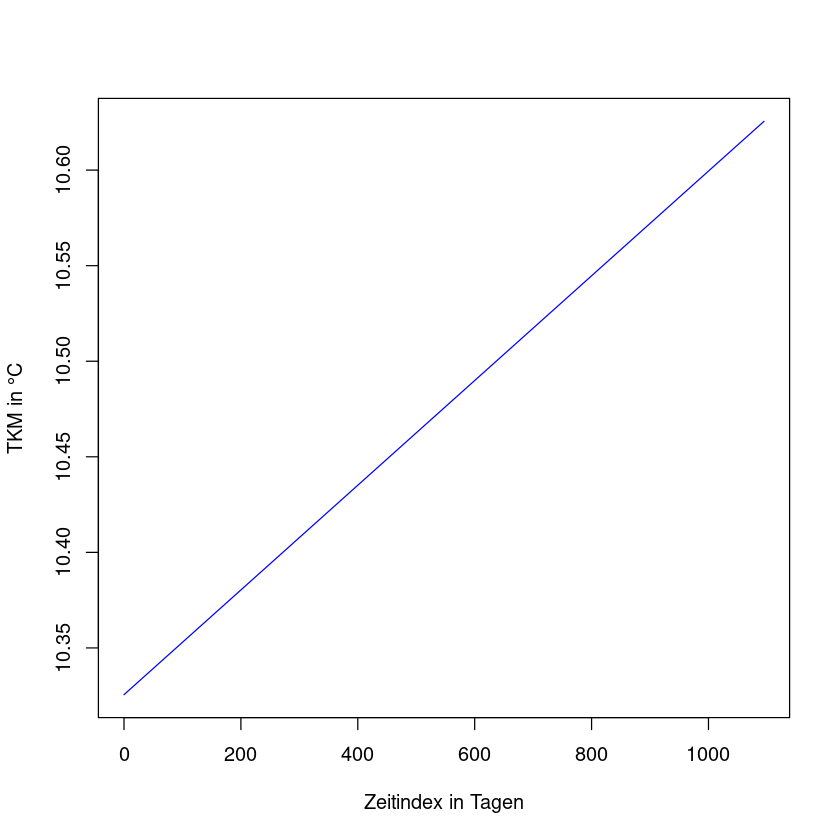

In [18]:
plot(vorhersage_zeit$Zeitindex, vorhersage[,1], type = "l", xlab = "Zeitindex in Tagen", ylab = "TKM in °C", col = "blue")
min(vorhersage[,1])
max(vorhersage[,1])

In [ ]:
# Residuen plotten - nach Skript S114
par(mfrow=c(1,2))
plot(modell_tmk,c(1,2))

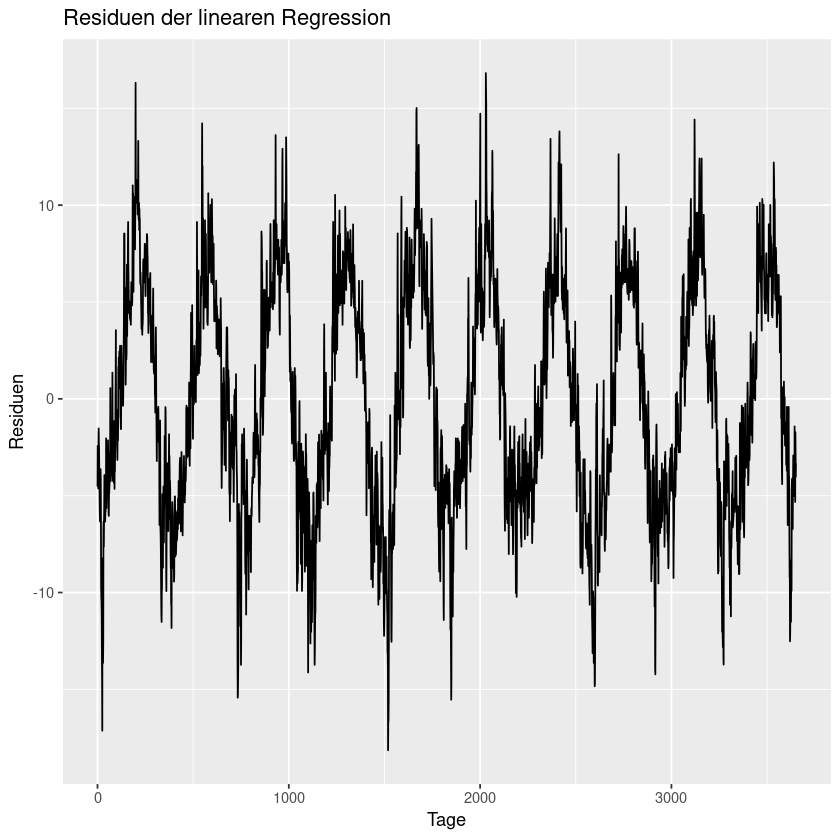

In [20]:
# Weitere Darstellungen - evtl. fortsetzen

library(ggplot2)

# Residuen plotten, um die Anpassung zu überprüfen
ggplot(norderney, aes(x = Zeitindex, y = residuals(modell_tmk))) +
  geom_line() +
  labs(title = "Residuen der linearen Regression", x = "Tage", y = "Residuen")

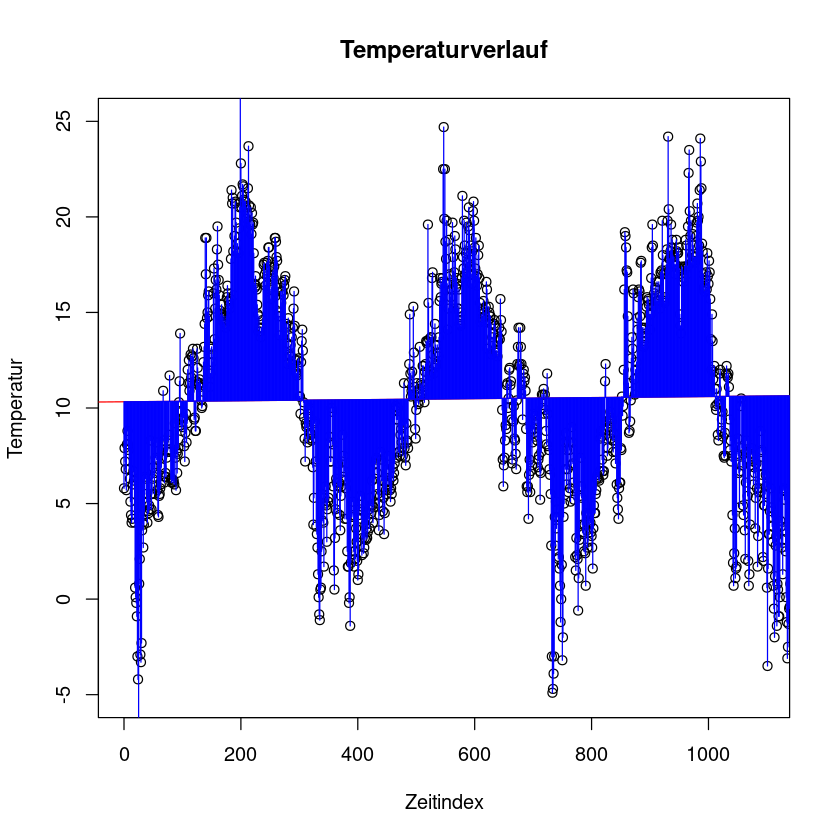

In [25]:
# Skript S.111 - Die von R berechnete Ausgleichsgerade
plot(
    norderney$Zeitindex, 
    norderney$TMK, 
    type="p", 
    xlab="Zeitindex", ylab="Temperatur", 
    main="Temperaturverlauf", 
    xlim = c(0,1095),
    ylim = c(-5, 25)
)
abline(modell_tmk, col="red")
segments(norderney$Zeitindex, fitted(modell_tmk), norderney$Zeitindex, norderney$TMK, col="blue")

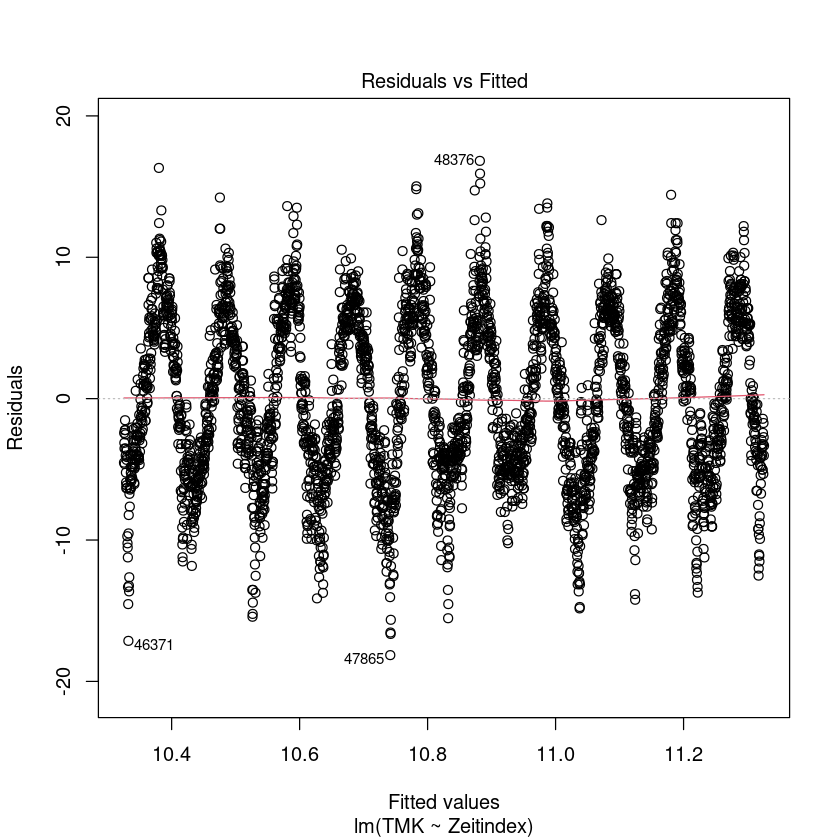

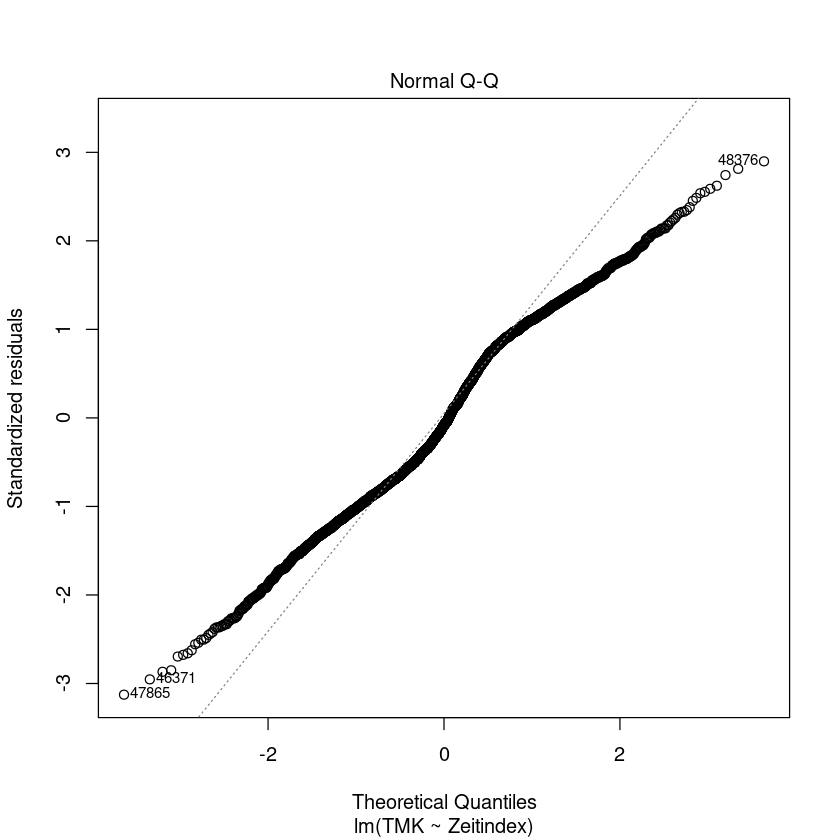

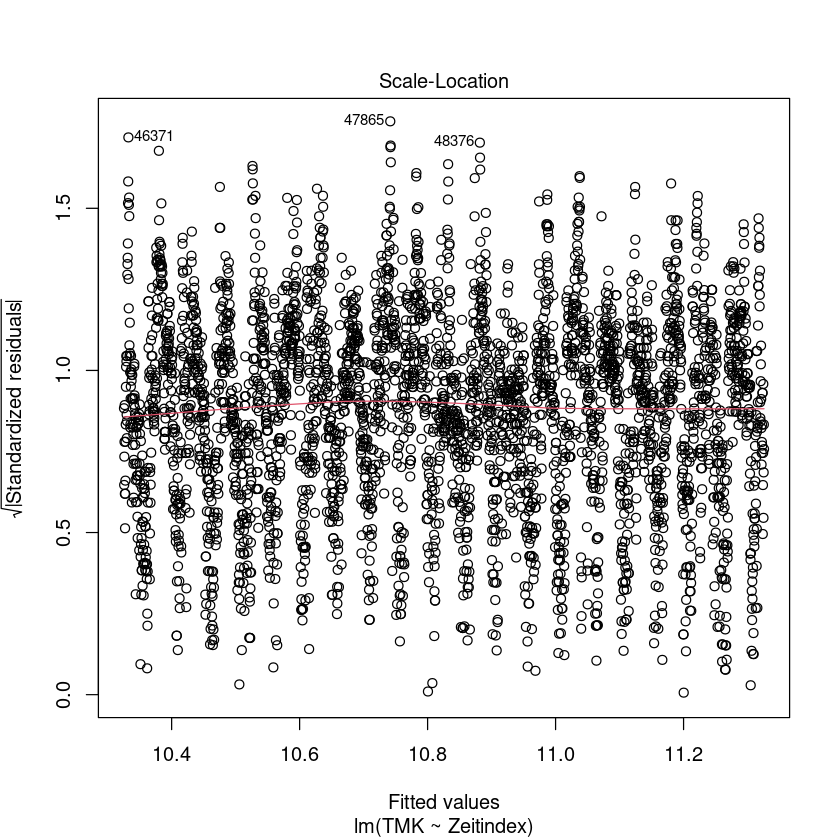

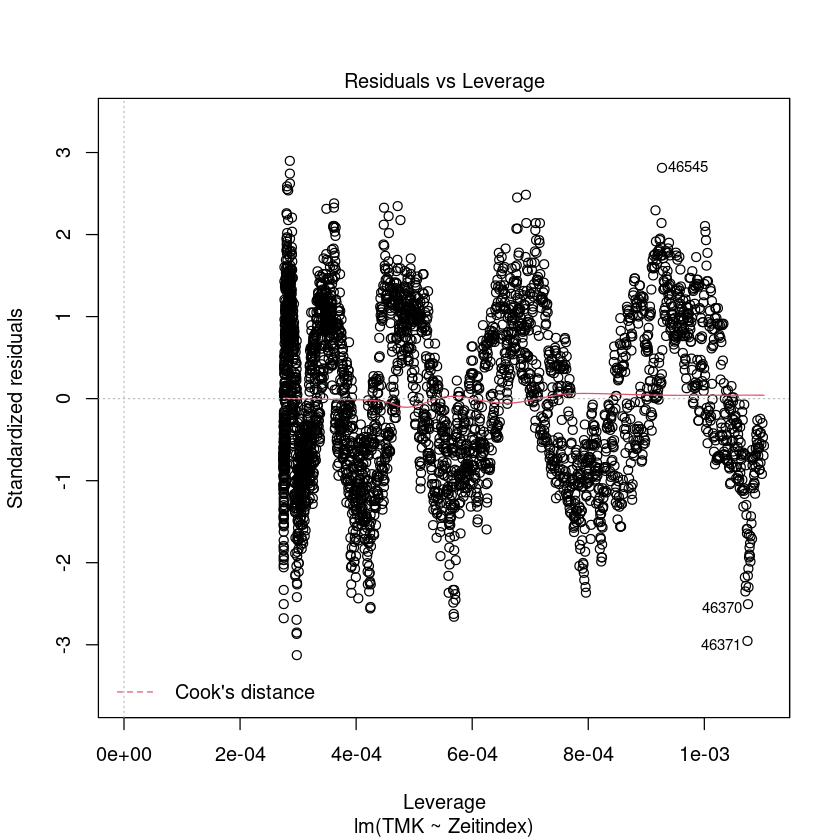

In [23]:
plot(modell_tmk)